In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [128]:
df = pd.read_csv("profiles.csv")

In [129]:
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [131]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [132]:
df.shape

(60552, 31)

In [133]:
#repeated lines deleted
df=df.drop_duplicates()[:9514]

In [134]:
# The columns named essay were deleted because they were mostly null
for i in df:
    if ("essay" in i):
        df.drop(i,axis=1,inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   ethnicity    8565 non-null   object 
 7   height       9514 non-null   float64
 8   income       9514 non-null   float64
 9   job          8183 non-null   object 
 10  last_online  9514 non-null   object 
 11  location     9514 non-null   object 
 12  offspring    3886 non-null   object 
 13  orientation  9514 non-null   object 
 14  pets         6352 non-null   object 
 15  religion     6261 non-null   object 
 16  sex          9514 non-null   object 
 17  sign         7776 non-null   object 
 18  smokes       8596 non-null   object 
 19  speaks

In [136]:
df["drinks"] = df["drinks"].map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})
df["drugs"] = df["drugs"].map({"never":0, "sometimes":1, "often":2})
df["smokes"] = df["smokes"].map({"no":0, "trying to quit":1, "sometimes":2, "when drinking":3, "yes":4})

In [137]:
df.body_type.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [138]:
df['body_type']=df['body_type'].map({'fit':'sporty',
                                     'athletic':'sporty',
                                     'thin':'sporty',
                                     'skinny':'sporty',
                                    'average':'average',
                                    'curvy':'curvy', 
                                     'a little extra':'curvy',
                                     'full figured':'curvy',
                                    'overweight':'bad',
                                     'jacked':'bad',
                                     'used up':'bad',
                                     'rather not say':'bad'})

In [139]:
df['body_type'].unique()

array(['curvy', 'average', 'sporty', nan, 'bad'], dtype=object)

<AxesSubplot:>

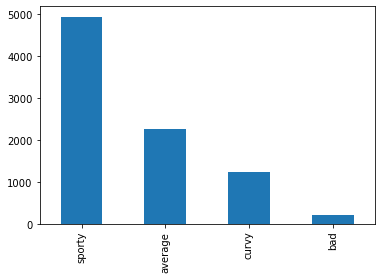

In [140]:
df.body_type.value_counts().plot.bar()

In [141]:
df.diet.unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

<AxesSubplot:>

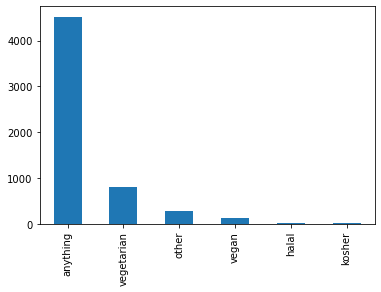

In [142]:
#modtsly strictly ifadelerini kaldirdik
status={"mostly":"","strictly":""}
df["diet"].replace(status,regex=True,inplace=True)
df["diet"]=df["diet"].str.strip()
df["diet"].value_counts().plot.bar()

In [143]:
df.diet.unique()

array(['anything', 'other', 'vegetarian', nan, 'vegan', 'halal', 'kosher'],
      dtype=object)

In [144]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)

In [145]:
df.education.unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

<AxesSubplot:>

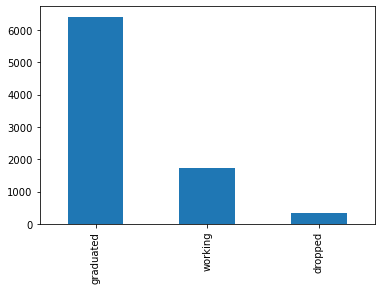

In [146]:
edu = {'working':'student','graduated from':'graduated','dropped out':'dropped'}
edu2 = {'college/university':'graduated','two-year':'graduated','space':'graduated','masters':'graduated','high':'graduated','ph.d':'graduated','law':'graduated'}
df["education"].replace(edu,inplace=True)
df["education"]=df["education"].str.split().str[0]
df['education'].replace(edu2,inplace=True)
df["education"].value_counts().plot.bar()

In [147]:
df.education.unique()

array(['working', 'graduated', nan, 'dropped'], dtype=object)

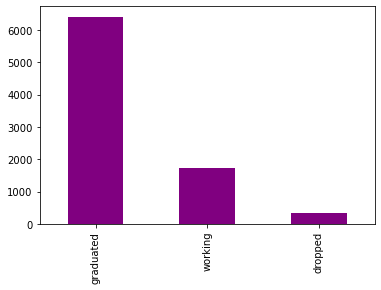

In [148]:
df.education.value_counts().plot.bar(color='purple');

In [149]:
df.last_online

0       2012-06-28-20-30
1       2012-06-29-21-41
2       2012-06-27-09-10
3       2012-06-28-14-22
4       2012-06-27-21-26
              ...       
9509    2012-06-30-02-49
9510    2012-04-05-21-46
9511    2012-04-28-12-42
9512    2012-03-01-15-17
9513    2012-06-14-15-14
Name: last_online, Length: 9514, dtype: object

<AxesSubplot:xlabel='last_online_year', ylabel='count'>

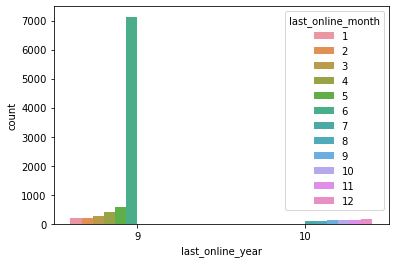

In [150]:
df["last_online_year"]=2021-(df['last_online'].str[:4]).astype(int)
df["last_online_month"]=(df['last_online'].str[5:7]).astype(int)
df.drop('last_online',axis=1)
sns.countplot("last_online_year",hue="last_online_month",data=df)

<AxesSubplot:>

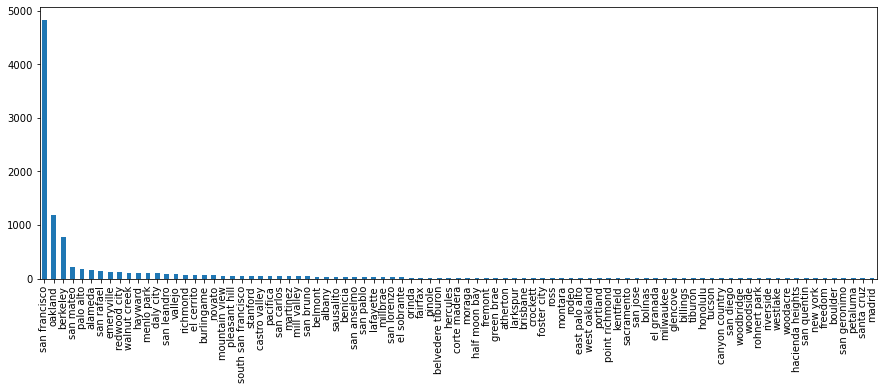

In [151]:
df.location=df.location.str.split(",").str[0]
plt.figure(figsize=(15,5))
df.location.value_counts().plot.bar()

<AxesSubplot:>

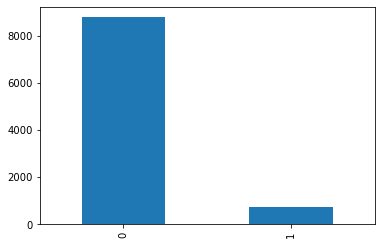

In [152]:
offsprings=[]
for i in df.offspring.fillna("unknown").str.replace("[^\w\s]",""):
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "unknown" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")
        
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)
df["offspring"].value_counts().plot.bar()

<AxesSubplot:>

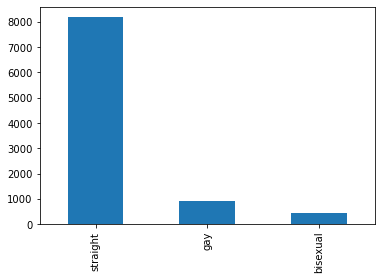

In [153]:
df.orientation.value_counts().plot.bar()

In [154]:
df.religion

0          agnosticism and very serious about it
1       agnosticism but not too serious about it
2                                            NaN
3                                            NaN
4                                            NaN
                          ...                   
9509                                christianity
9510                                     atheism
9511               atheism and laughing about it
9512                                         NaN
9513                                         NaN
Name: religion, Length: 9514, dtype: object

<AxesSubplot:>

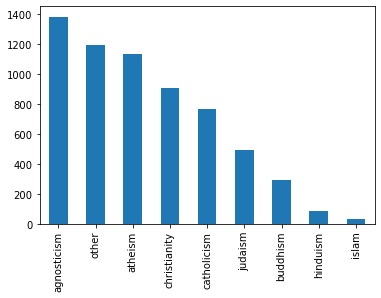

In [155]:
df["religion"]=df["religion"].str.split().str[0]
df["religion"].value_counts().plot.bar()

In [156]:
df.sign

0                                         gemini
1                                         cancer
2             pisces but it doesn&rsquo;t matter
3                                         pisces
4                                       aquarius
                          ...                   
9509     aries and it&rsquo;s fun to think about
9510         scorpio but it doesn&rsquo;t matter
9511       leo and it&rsquo;s fun to think about
9512                                       aries
9513    pisces and it&rsquo;s fun to think about
Name: sign, Length: 9514, dtype: object

<AxesSubplot:>

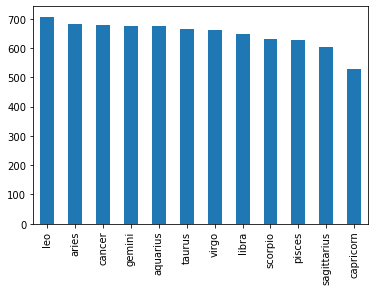

In [157]:
df["sign"]=df["sign"].str.split().str[0]
df["sign"].value_counts().plot.bar()

In [158]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].median(),inplace=True) #number tipinde olan sutunlari ortalama deger ile dolduruyoruz

In [159]:
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True) #object türünden olan ifadeler en çok tekrar eden ile dolduruypruz

In [160]:
df.age

0       22.0
1       35.0
2       38.0
3       23.0
4       29.0
        ... 
9509    28.0
9510    31.0
9511    34.0
9512    29.0
9513    49.0
Name: age, Length: 9514, dtype: float64

In [161]:
epoch=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        epoch.append("Millennial")
    elif (i>=33) and (i<=47):
        epoch.append("Gen X-er")
    elif (48>=33) and (i<=70):
        epoch.append("Boomers")
    else:
        epoch.append("Unkown")

df["epoch"]=epoch

<AxesSubplot:>

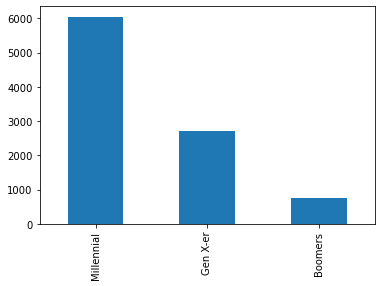

In [162]:
df["epoch"].replace("Unkown","Boomers",regex=True,inplace=True)
df["epoch"].value_counts().plot.bar()

In [163]:
df["epoch"]= df["epoch"].map({"Millennial":0,"Gen X-er":1,"Boomers":2})

In [164]:
df['age']=df['age'].astype(int)

In [165]:
for col in ('body_type','diet','sex','status','orientation','education'):
    df[col] = df[col].astype('category')

In [166]:
df.corr

<bound method DataFrame.corr of       age body_type        diet  drinks  drugs  education  \
0      22     curvy    anything     2.0    0.0    working   
1      35   average       other     3.0    1.0    working   
2      38    sporty    anything     2.0    0.0  graduated   
3      23    sporty  vegetarian     2.0    0.0    working   
4      29    sporty    anything     2.0    0.0  graduated   
...   ...       ...         ...     ...    ...        ...   
9509   28    sporty    anything     2.0    0.0    working   
9510   31    sporty    anything     2.0    1.0  graduated   
9511   34   average    anything     2.0    0.0    dropped   
9512   29    sporty    anything     1.0    0.0  graduated   
9513   49       bad    anything     1.0    0.0  graduated   

                ethnicity  height   income                          job  \
0            asian, white    75.0     -1.0               transportation   
1                   white    70.0  80000.0         hospitality / travel   
2         

<AxesSubplot:>

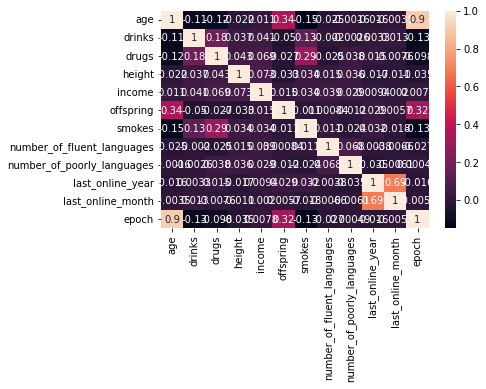

In [167]:
sns.heatmap(df.corr(),annot=True)

In [168]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
ethnicity                     0
height                        0
income                        0
job                           0
last_online                   0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
number_of_fluent_languages    0
number_of_poorly_languages    0
last_online_year              0
last_online_month             0
epoch                         0
dtype: int64

## Can your date guess your age?

In [169]:
df2=pd.get_dummies(df,drop_first=True)

In [170]:
df2.shape

(9514, 7042)

In [171]:
x,y=df2.drop("age",axis=1),df2[["age"]]

In [172]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [173]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,8.584366e-01,3.586918e+00,2.919634
Ridge,8.262137e-01,3.974237e+00,3.149011
Lasso,7.919368e-01,4.348542e+00,3.330000
ExtraTreeRegressor,7.509281e-01,4.757824e+00,3.717288
KNeighborsRegressor,5.668742e-01,6.274123e+00,4.528429
ElasticNet,5.354550e-01,6.497704e+00,4.665899
LinearRegression,-1.924773e+10,1.322622e+06,762042.319160


In [174]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [175]:
y=df[["epoch"]]

In [176]:
df_class=df.drop("epoch",axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [177]:
classification_funct(x,y)

,accuracy_score
DecisionTreeClassifier,1.000000
XGBClassifier,1.000000
KNeighborsClassifier,0.987388
GaussianNB,0.963741
RandomForestClassifier,0.944298
LogisticRegression,0.866527
BernoulliNB,0.672622
SVC,0.647399


In [178]:
df_class=df.drop(["epoch","age"],axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [179]:
classification_funct(x,y)

,accuracy_score
XGBClassifier,0.674199
BernoulliNB,0.672622
RandomForestClassifier,0.671046
SVC,0.647399
GaussianNB,0.642144
LogisticRegression,0.642144
KNeighborsClassifier,0.627956
DecisionTreeClassifier,0.603258


### Deep Learning

In [180]:
scaler=MinMaxScaler()

In [181]:
x=scaler.fit_transform(x)

In [182]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039
0,0.4,0.0,0.661017,0.000000,0.0,0.5,0.0,0.0,0.0,0.454545,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.6,0.5,0.576271,0.080001,0.0,0.0,0.0,0.4,0.0,0.454545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.4,0.0,0.542373,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.593220,0.020001,0.0,0.0,0.0,0.2,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.4,0.0,0.508475,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [183]:
x.shape , y.shape

((9514, 7040), (9514, 1))

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [185]:
model=Sequential()
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse') 

In [186]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, verbose=1)

Epoch 1/100
60/60 [==============================] - 8s 97ms/step - loss: 0.3795 - val_loss: 0.3026
Epoch 2/100
60/60 [==============================] - 5s 83ms/step - loss: 0.2241 - val_loss: 0.3609
Epoch 3/100
60/60 [==============================] - 5s 91ms/step - loss: 0.0885 - val_loss: 0.3728
Epoch 4/100
60/60 [==============================] - 6s 92ms/step - loss: 0.0467 - val_loss: 0.4407
Epoch 5/100
60/60 [==============================] - 6s 92ms/step - loss: 0.0344 - val_loss: 0.4136
Epoch 6/100
60/60 [==============================] - 6s 94ms/step - loss: 0.0227 - val_loss: 0.3969
Epoch 7/100
60/60 [==============================] - 5s 91ms/step - loss: 0.0183 - val_loss: 0.4105
Epoch 8/100
60/60 [==============================] - 5s 91ms/step - loss: 0.0145 - val_loss: 0.4143
Epoch 9/100
60/60 [==============================] - 5s 90ms/step - loss: 0.0103 - val_loss: 0.4286
Epoch 10/100
60/60 [==============================] - 5s 90ms/step - loss: 0.0099 - val_loss: 0.4352

60/60 [==============================] - 5s 88ms/step - loss: 2.1105e-06 - val_loss: 0.4380
Epoch 82/100
60/60 [==============================] - 5s 91ms/step - loss: 1.5080e-06 - val_loss: 0.4384
Epoch 83/100
60/60 [==============================] - 5s 90ms/step - loss: 9.9003e-07 - val_loss: 0.4381
Epoch 84/100
60/60 [==============================] - 5s 86ms/step - loss: 9.1506e-07 - val_loss: 0.4381
Epoch 85/100
60/60 [==============================] - 5s 81ms/step - loss: 6.6801e-07 - val_loss: 0.4384
Epoch 86/100
60/60 [==============================] - 5s 90ms/step - loss: 6.5748e-07 - val_loss: 0.4383
Epoch 87/100
60/60 [==============================] - 5s 89ms/step - loss: 4.9408e-07 - val_loss: 0.4382
Epoch 88/100
60/60 [==============================] - 5s 90ms/step - loss: 4.5407e-07 - val_loss: 0.4382
Epoch 89/100
60/60 [==============================] - 5s 89ms/step - loss: 4.2986e-07 - val_loss: 0.4383
Epoch 90/100
60/60 [==============================] - 5s 83ms/step -

In [187]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               5632800   
                                                                 
 dense_1 (Dense)             (None, 800)               640800    
                                                                 
 dense_2 (Dense)             (None, 800)               640800    
                                                                 
 dense_3 (Dense)             (None, 800)               640800    
                                                                 
 dense_4 (Dense)             (None, 800)               640800    
                                                                 
 dense_5 (Dense)             (None, 800)               640800    
                                                                 
 dense_6 (Dense)             (None, 1)                 8

In [188]:
pred=model.predict(x_test)

60/60 [==============================] - 1s 14ms/step



success rate

In [189]:
(mean_squared_error(y_test,pred))**.5

0.6622085745997063

In [190]:
r2_score(y_test,pred)

-0.09247650059517443